# Aprendiendo Fashion-MNIST con PyTorch

## Refs.

* https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html

* https://github.com/zalandoresearch/fashion-mnist

* https://github.com/pranay414/Fashion-MNIST-Pytorch/blob/master/fashion_mnist.ipynb

## **Ejercicio 1)** Importando librerías

**0)** De ser necesario, **instale PyTorch** escribiendo

    !pip3 install torch torchvision torchaudio torchviz

**1)** Importe las librerías estandard de Python: `os`, `datetime`, `collections` y `pickle`.

**2)** Importe las siguientes librerías third party de Python: `matplotlib.pyplot`, `numpy`, `scipy`, `sklearn`, `pandas`, `dill` y `json`.

**3)** Importe las librerias necesarias de **PyTorch**: `torch` y `torchvision`.

**4)** Importe la librería: `google.colab`.

In [1]:
# 1.0)
!pip3 install torch torchvision torchaudio torchviz

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: C:\Users\usuario\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
# 1.1)
import os
import pickle
import datetime
from collections import defaultdict


In [3]:
# 1.2)
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import scipy as sp
import scipy.linalg as linalg
import sklearn as skl
import pandas as pd
#import dill
import json

In [4]:
# 1.3)
import torch
import torch.optim as optim
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader, Subset, random_split
from torchvision import datasets
from torchvision import transforms
from torchvision.io import read_image
from torchvision.transforms import ToTensor, Lambda, Compose
#from torchviz import make_dot

In [5]:
# 1.4)
#import google.colab
#from google.colab import files

## **Ejercicio 2)**

Bajando y Jugando con el dataset **Fashion-MNIST**.

**1)** Baje y transforme (i.e. normalize los valores de los pixeles) los conjuntos de entrenamiento y testeo de FashionMNIST.

**2)** Explore algunos ejemplos de estos conjuntos. Que formato poseen?

**3)** Visitando la página web de FashionMNIST, cree un diccionario de Python `Dict()` asociando cada categoría a un nombre adecuado de la misma.

**4)** Grafique un mosaico de 3x3 imagenes de FashionMNIST, cada una titulada con su respectiva clasificación

In [6]:
# 2.1)
# Define a transform to normalize the data
transform = transforms.Compose([
                                transforms.ToTensor()
                                ,transforms.Normalize((0.5,), (0.5,))
                                #,transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                               ])

# Download and load the training data
train_set = datasets.FashionMNIST('MNIST_data/', download = True, train = True,  transform = transform)
valid_set = datasets.FashionMNIST('MNIST_data/', download = True, train = False, transform = transform)

In [7]:
#2.2
len(train_set),  len(valid_set)

(60000, 10000)

In [8]:
i = np.random.randint(len(train_set))
print(f"i={i}")
image,label = train_set[1]

i=2811


In [9]:
label

0

In [10]:
1

1

In [11]:
image.shape
torch.Size([1,28,28])

torch.Size([1, 28, 28])

In [12]:
image.numpy().squeeze().shape

(28, 28)

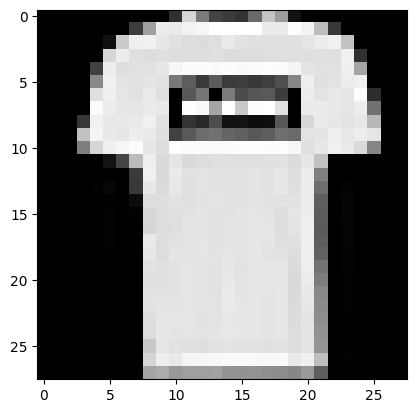

In [13]:
plt.imshow(image.squeeze(),cmap="Greys_r")

In [14]:
#2.3
labels_name = {
    0: "T-shirt/top", #polera manga corta
    1: "Trouser",   #pantalón
    2: "Pullover",  #chaleco
    3: "Dress",     #vestido
    4: "Coat",      #abrigo
    5: "Sandal",   #sandalia
    6: "Shirt",    #camisa
    7: "Sneaker",  #zapatilla
    8: "Bag",      #bolso
    9: "Ankle boot" #bototo
}

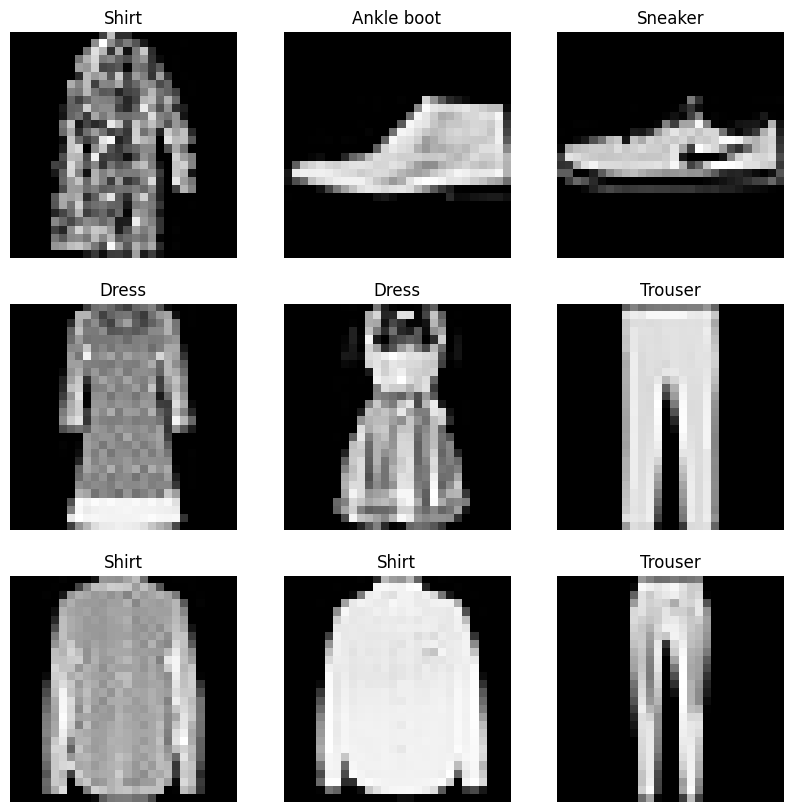

In [15]:
#2.4
figure = plt.figure(figsize=(10,10))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    j = torch.randint(len(train_set), size=(1,)).item()
    image,label = train_set[j]
    figure.add_subplot(rows,cols,i)
    plt.title(labels_name[label])
    plt.axis("off")
    plt.imshow(image.squeeze(),cmap="Greys_r")
plt.show()


## Ejercicio 3)

Creando un `DataLoader` para alimentar el modelo con batchs (lotes) de entrenamiento.

**1)** Cree los `DataLoader`s para cada conjunto. Defínalos con un `batch_size` de 100 y con el flag `shuffle` seteado a `True`.

**2)** Use uno de los `DataLoader`s creados anteriormente para explorar algunos elementos del conjunto.

Notar que, el iterador devuelve el batch en un par `(image,label)`.

El objeto `images` es un tensor de dimensiones `(100,1,28,28)`.
El 100 es el tamaño del batch.
El 1 porque hay un solo canal (en este caso, un canal de escala de grises, pero podría haber varios, p. ej. uno por cada color de {Red, Green Blue} en caso que fuesen imagenes a color).
Luego, 28 y 28 porque cada imagen del dataset es de 28 x 28 píxeles.

El objeto `labels` es un tensor de dimensiones `(100,)`.
La $i$-ésima entrada `labels[i]` de `labels` es un número en $\{0,1,...,9\}$ indicando la categoría a la que pertenece la $i$-ésima imagen en el batch, guardada en `images[i]`.

In [16]:
# 3.1)
train_loader = torch.utils.data.DataLoader(train_set, batch_size = 100, shuffle = True)
valid_loader = torch.utils.data.DataLoader(valid_set, batch_size = 100, shuffle = True)

In [17]:
len(train_loader.dataset)

60000

In [18]:
len(train_set)

60000

In [19]:
train_iter = iter(train_loader)
images, labels = next(train_iter)
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([100, 1, 28, 28])
torch.Size([100])


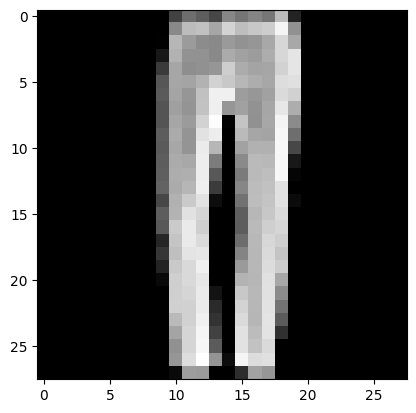

In [20]:
plt.imshow(images[1].squeeze(),cmap='Greys_r')

In [21]:
images[0].shape

torch.Size([1, 28, 28])

In [22]:
labels

tensor([4, 1, 1, 9, 9, 5, 9, 0, 8, 7, 3, 7, 1, 8, 8, 4, 3, 0, 6, 4, 5, 6, 4, 4,
        7, 8, 7, 1, 3, 1, 4, 7, 1, 0, 7, 1, 7, 4, 0, 5, 6, 5, 9, 0, 1, 5, 3, 1,
        8, 8, 9, 3, 7, 6, 6, 2, 5, 1, 2, 4, 9, 8, 4, 8, 3, 7, 5, 6, 1, 0, 7, 1,
        7, 8, 5, 4, 5, 4, 5, 9, 0, 1, 4, 7, 8, 6, 9, 4, 0, 8, 6, 3, 9, 5, 3, 5,
        4, 7, 7, 0])

In [23]:
labels.numpy()

array([4, 1, 1, 9, 9, 5, 9, 0, 8, 7, 3, 7, 1, 8, 8, 4, 3, 0, 6, 4, 5, 6,
       4, 4, 7, 8, 7, 1, 3, 1, 4, 7, 1, 0, 7, 1, 7, 4, 0, 5, 6, 5, 9, 0,
       1, 5, 3, 1, 8, 8, 9, 3, 7, 6, 6, 2, 5, 1, 2, 4, 9, 8, 4, 8, 3, 7,
       5, 6, 1, 0, 7, 1, 7, 8, 5, 4, 5, 4, 5, 9, 0, 1, 4, 7, 8, 6, 9, 4,
       0, 8, 6, 3, 9, 5, 3, 5, 4, 7, 7, 0])

In [24]:
labels.numpy().shape

(100,)

In [25]:
labels[0]

tensor(4)

## Ejercicio 4)

Defina una red neuronal de 4 capas, una de entrada, dos ocultas de $n_1=128$ y $n_2=64$ neuronas, respectivamente, y una de salida de 10 neuronas.

En las capas intermedias utilice neuronas tipo ReLU y agregueles un *dropout* de p=0.2.
En la capa de salida no utilice funciones de activación ni dropout.

Las capas sucesivas tienen que estar totalmente conectadas entre si.

In [26]:
# 4)
#forma 1
class Neuralnetwork(nn.Module):
     def __init__(self,n1,n2,p=0.2):
         super(Neuralnetwork, self).__init__()
         self.flatten = nn.Flatten()
         #capa 1
         self.fc1 = nn.Linear(28*28, n1)
         self.relu1 = nn.ReLU()
         self.dropo = nn.Dropout(p)
         #capa 2
         self.fc2 = nn.Linear(n1, n2)
         self.relu2 = nn.ReLU()
         self.dropo = nn.Dropout(p)
         #capa 3
         self.fc3 = nn.Linear(n2, 10)

     def forward(self, x):
        #capa 0
          x = self.flatten(x)
          #capa 1
          x = self.fc1(x)
          x = self.relu1(x)
          x = self.dropo(x)
          #capa 2
          x = self.fc2(x)
          x = self.relu2(x)
          x = self.dropo(x)
          #capa 3
          x = self.fc3(x)
          return x


## Ejercicio 5)

Entrenamos el modelo

**1)** Implemente, en una función, un loop de entrenamiento que recorra los batchs (lotes).

**2)** Implemente, en una función, un loop de validación que recorra los batchs.

**3)** Inicialize dos `DataLoader`s llamados `train_loader` y `valid_loader` a partir del `train_set` (conjunto de entranmiento) y del `valid_set` (conjunto de validación) de Fashion-MNIST, respectivamente, y que usen batchs de 100 ejemplos.

**4)** Cree una función de pérdida usando la **Cross Entropy Loss**.

**IMPORTANTE:** Notar que la **Cross Entropy Loss** aplica automáticamente una `log_softmax`.

**5)** Cree un optimizador que utilice el método de **Stochastic Gradient Descent** con un learning rate igual a $10^{-3}$.

**6)** Cree una instancia del modelo.

**7)** Especifique en que dispositivo (`device`) va a trabajar: en una **CPU** o en una **GPU**.

**8)** Implemente un loop de entrenamiento y validación que trabaje con el `train_loader` y el `valid_loader`, respectivamente, usando un numero arbitrario de épocas.
Este loop debe guardar en cuatro listas los valores de los promedios del **Cross Entropy Loss** y las fracciones de clasificaciones correctas o **precisión** (accuracy) sobre el conjunto de **entrenamiento** y el de **validación**, respectivamente.

**IMPORTANTE:** No olvide copiar los batchs al dispositivo de trabajo.

**9)** Entrene y valide el modelo.

**10)** Use las listas del inciso anterior para graficar en función de las épocas la **Cross Entropy Loss** de **entrenamiento** y de **validación**.
Realize un gráfico análogo pero con la **precisión**.
Discuta y comente, cual es el número óptimo de épocas de entrenamiento?

**11)** Repita los experimentos variando hiperparámetros. Por ejemplo:

- El learning-rate.
- El optimizador (ej. puede usar ADAM).
- El valor de dropout.
- El número de neuronas en las capas intermedias.
- El número de épocas de entrenamiento.
- El tamaño de los lotes.

Discuta los resultados.

In [27]:
# 5.1)
def train_loop(dataloader, model, loss_fn, optimizer):

    #Se activa la maquina de entrenamiento
    model.train()

    #se define constantes
    num_samples = len(dataloader.dataset)
    num_batches = len(dataloader)
    sum_loss = 0
    sum_correct = 0
    sum_samples = 0

    #iteramos sobre los lotes
    for batch, (X, y) in enumerate(dataloader):

        #se copia las entradas y las salidas al dispositivo de trabajo
        X, y = X.to(device), y.to(device)
        batch_size = len(X)
        sum_samples += batch_size

        #se predice la salida
        pred = model(X)

        #se calcula la perdida
        loss = loss_fn(pred, y)
        #se realiza el backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        #se acumula la perdida promedio
        sum_loss += loss.item() * batch_size
        #se calcula el numero de aciertos
        sum_correct = (pred.argmax(1) == y).type(torch.float).sum().item()
        #reportamos el progreso
        if batch % (num_batches // 10) == 0:
            avrg_loss = sum_loss / sum_samples
            print(f"@train batch {batch:>5d}/{num_batches:>5d}  avrg_loss: {avrg_loss:>7f} processed-samples: {100 * sum_samples / num_samples:>5f}")
    assert num_samples == sum_samples
    avrg_loss = sum_loss / sum_samples
    precision = sum_correct / sum_samples
    return avrg_loss, precision

In [28]:
#5.3 Inicialize dos DataLoaders llamados train_loader y valid_loader a partir del train_set (conjunto de entranmiento) y del valid_set (conjunto de validación) de Fashion-MNIST, respectivamente, y que usen batchs de 100 ejemplos.
#creamos los DataLoaders
batch_size = 100
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_set, batch_size=batch_size, shuffle=True)


In [29]:
#5.4 Cree una función de pérdida usando la Cross Entropy Loss.
loss_fn = nn.CrossEntropyLoss()

In [30]:
#5.5
n1 = 128
n2 = 64
p=0.2
model = Neuralnetwork(n1,n2,p=p)


In [31]:
#5.6 Creea un optimizador que utilice el método de Stochastic Gradient Descent con un learning rate igual a 10^-3
learning_rate = 1e-3
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
#optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, eps=1e-08, weight_decay=0, amsgrad=False)

In [32]:
#5.7
#determinamos en que dispositivos vamos a trabajar, una CPU o una GPU si está disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#pasamos el modelo al dispositivo
model = model.to(device)

In [33]:
def eval_loop(dataloader, model, loss_fn):
    """
    Evaluates model performance on a dataset

    Args:
        dataloader: PyTorch DataLoader with validation/test data
        model: Neural network model
        loss_fn: Loss function

    Returns:
        tuple: (average_loss, accuracy)
    """
    # Switch to evaluation mode
    model.eval()

    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    total_loss = 0
    correct = 0

    # Disable gradient computation for efficiency
    with torch.no_grad():
        for X, y in dataloader:
            # Move data to correct device
            X, y = X.to(device), y.to(device)

            # Forward pass
            pred = model(X)

            # Accumulate batch loss
            total_loss += loss_fn(pred, y).item() * len(X)

            # Count correct predictions
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    # Calculate averages
    avg_loss = total_loss / size
    accuracy = correct / size

    return avg_loss, accuracy

In [34]:
#probando mi validloop en el codigo de juan
def valid_loop(dataloader,model,loss_fn):
    model.eval()
    num_samples = len(dataloader.dataset)
    num_batches = len(dataloader)
    sum_loss = 0
    sum_correct = 0
    sum_samples = 0
    with torch.no_grad(): # es un context manager que desactiva el cálculo del gradiente momentáneamente, 
        #para ahorrar memoria y mejorar el rendimiento durante la evaluación del modelo.

        for X,y in dataloader: #iteramos sobre los batches del dataloader, esto es posible ya que si bien dataloader no es una lista,
            # implementa el protocolo iterable de python, por lo que se puede usar en un for, y en cada iteracion genera un batch nuevo

            # Copiamos las salidas y entradas al dispositivo de trabajo
            X, y = X.to(device), y.to(device)
            batch_size = len(X)
            sum_samples += batch_size

            pred = model(X)
            loss = loss_fn(pred, y)

            sum_loss += loss.item() * batch_size
            sum_correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    
    assert num_samples == sum_samples, "Error en el conteo de muestras procesadas"
    avrg_loss = sum_loss / sum_samples
    precision = sum_correct / sum_samples
    print(f"@eval_loop_avg_loss={avrg_loss:>8f}  precision={100*precision:0.1f}%")

    return avrg_loss, precision

In [35]:
#5.8 y 5.9
#entrenamos iterando entre epocas y se prueba el modelo en cada una de ellas
#list_valid_avg_loss_incorrecta = [] ##No tiene sentido esta linea
num_epochs = 30
list_train_avg_loss_incorrecta = []
list_train_avg_loss = []
list_valid_avg_loss = []
list_train_precision_incorrecta = []
list_train_precision = []
list_valid_precision = []



for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}\n-------------------------------")
    train_avg_loss_incorrecta,train_precision_incorrecta  = train_loop(train_loader, model, loss_fn, optimizer)
    train_avg_loss, train_precision                       = eval_loop(train_loader, model, loss_fn)
    valid_avg_loss, valid_precision                       = eval_loop(valid_loader, model, loss_fn)
    list_train_avg_loss_incorrecta.append(train_avg_loss_incorrecta)
    list_train_avg_loss.append(train_avg_loss)
    list_valid_avg_loss.append(valid_avg_loss)
    list_train_precision_incorrecta.append(train_precision_incorrecta)
    list_train_precision.append(train_precision)
    list_valid_precision.append(valid_precision)
    print("Done")


Epoch 1
-------------------------------
@train batch     0/  600  avrg_loss: 2.307521 processed-samples: 0.166667
@train batch    60/  600  avrg_loss: 2.305687 processed-samples: 10.166667
@train batch   120/  600  avrg_loss: 2.299222 processed-samples: 20.166667
@train batch   180/  600  avrg_loss: 2.291402 processed-samples: 30.166667
@train batch   240/  600  avrg_loss: 2.283762 processed-samples: 40.166667
@train batch   300/  600  avrg_loss: 2.276944 processed-samples: 50.166667
@train batch   360/  600  avrg_loss: 2.270024 processed-samples: 60.166667
@train batch   420/  600  avrg_loss: 2.262399 processed-samples: 70.166667
@train batch   480/  600  avrg_loss: 2.255376 processed-samples: 80.166667
@train batch   540/  600  avrg_loss: 2.247576 processed-samples: 90.166667
Done
Epoch 2
-------------------------------
@train batch     0/  600  avrg_loss: 2.165361 processed-samples: 0.166667
@train batch    60/  600  avrg_loss: 2.142996 processed-samples: 10.166667
@train batch   12

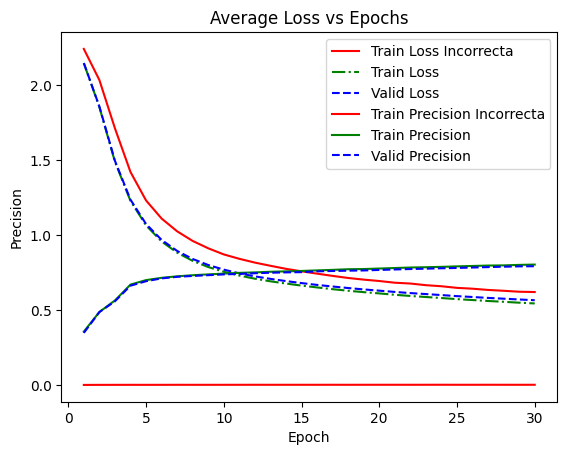

In [ ]:

#5.10
plt.xlabel("Epochs")
plt.ylabel("Average Loss")
plt.plot(range(1,len(list_train_avg_loss_incorrecta)+1),list_train_avg_loss_incorrecta,label="Train Loss Incorrecta", linestyle='-', c='red')
plt.plot(range(1,len(list_train_avg_loss)+1),list_train_avg_loss,label="Train Loss",linestyle='-.', c='green')
plt.plot(range(1,len(list_valid_avg_loss)+1),list_valid_avg_loss,label="Valid Loss",linestyle='--', c='blue')
plt.title("Average Loss vs Epochs")
plt.legend()



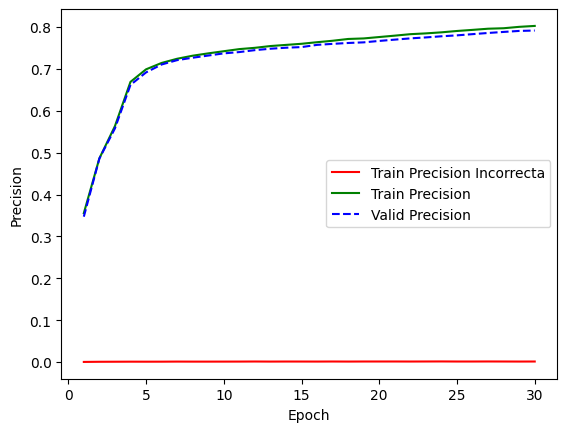

In [ ]:

plt.xlabel("Epoch")
plt.ylabel("Precision")
plt.plot(range(1,len(list_train_precision_incorrecta)+1),  list_train_precision_incorrecta, label="Train Precision Incorrecta",linestyle='-', c='red')
plt.plot(range(1,len(list_train_precision)+1),  list_train_precision, label="Train Precision",linestyle='-', c='green')
plt.plot(range(1,len(list_valid_precision)+1), list_valid_precision, label="Valid Precision",linestyle='--', c='blue')
plt.legend()
#plt.title("")
plt.show()

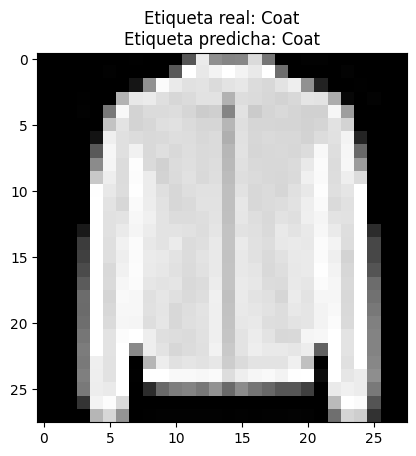

torch.Size([1, 28, 28])

In [39]:
# probando la red entrenada con un ejemplito
dataiter = iter(valid_loader)
images, labels = next(dataiter)
numero_img = 16
img = images[numero_img]  # Agregar dimensión de batch
label = labels[numero_img].item()
# Pasar la imagen por el modelo
with torch.no_grad():
    img = img.to(device)
    output = model(img.unsqueeze(0))  # Agregar dimensión de batch
    predicted_label = output.argmax(1).item()

#imagen:
plt.imshow(img.cpu().squeeze(), cmap='gray')
plt.title(f"Etiqueta real: {labels_name[label]}\nEtiqueta predicha: {labels_name[predicted_label]}")
plt.show()

img.shape
    

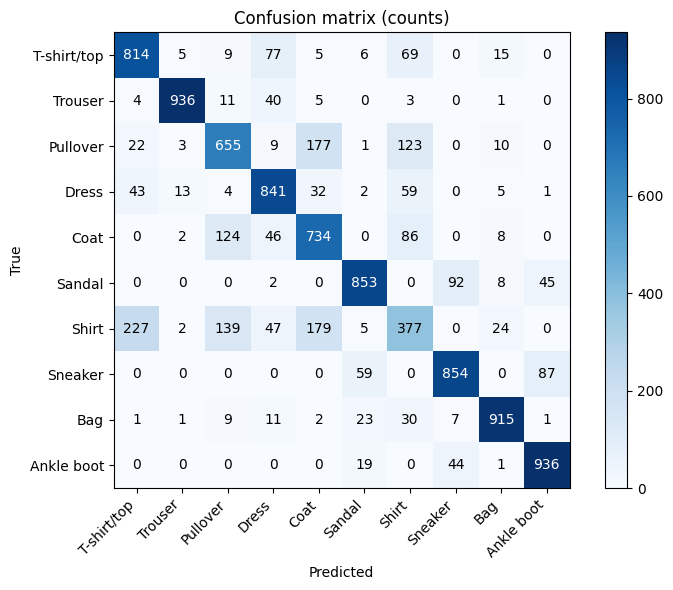

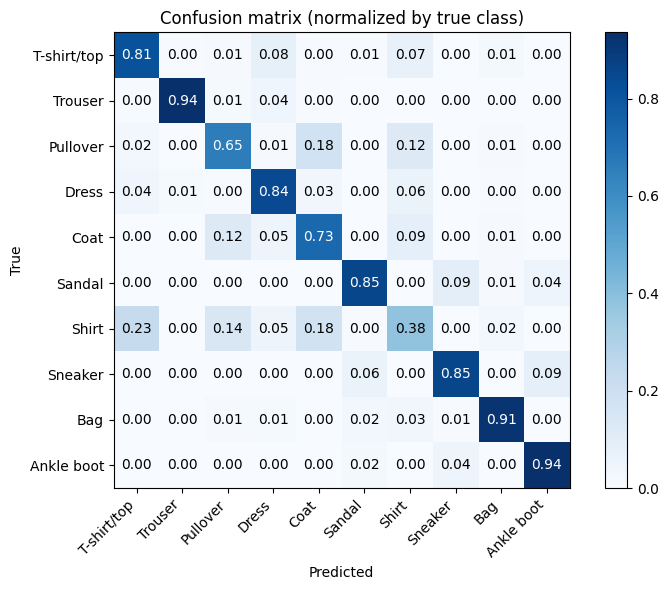

In [40]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Generar y mostrar matriz de confusión (conteos y normalizada) usando el valid_loader y el modelo ya definidos

# recolectar predicciones y etiquetas verdaderas
model.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for X, y in valid_loader:
        X, y = X.to(device), y.to(device)
        out = model(X)
        preds = out.argmax(dim=1)
        y_true.append(y.cpu().numpy())
        y_pred.append(preds.cpu().numpy())

y_true = np.concatenate(y_true)
y_pred = np.concatenate(y_pred)

# matriz de confusión (conteos)
cm = confusion_matrix(y_true, y_pred, labels=list(range(10)))

# plot de la matriz de confusión (conteos)
fig, ax = plt.subplots(figsize=(8,6))
cax = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar(cax, ax=ax)
classes = [labels_name[i] for i in range(10)]
ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes, rotation=45, ha='right')
ax.set_yticklabels(classes)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion matrix (counts)')
# Anotar celdas
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()

# matriz de confusión normalizada por fila (recall por clase)
cm_norm = cm.astype(float) / (cm.sum(axis=1, keepdims=True) + 1e-12)

fig, ax = plt.subplots(figsize=(8,6))
cax = ax.imshow(cm_norm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar(cax, ax=ax)
ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes, rotation=45, ha='right')
ax.set_yticklabels(classes)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion matrix (normalized by true class)')
# Anotar celdas con porcentaje
for i in range(cm_norm.shape[0]):
    for j in range(cm_norm.shape[1]):
        ax.text(j, i, f"{cm_norm[i, j]:.2f}",
                ha="center", va="center",
                color="white" if cm_norm[i, j] > 0.5 else "black")
plt.tight_layout()
plt.show()
